In [16]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('data2.csv')

# Display the first few rows
print(data.head())


  Marital status;Application mode;Application order;Course;"Daytime/evening attendance\t";Previous qualification;Previous qualification (grade);Nacionality;Mother's qualification;Father's qualification;Mother's occupation;Father's occupation;Admission grade;Displaced;Educational special needs;Debtor;Tuition fees up to date;Gender;Scholarship holder;Age at enrollment;International;Curricular units 1st sem (credited);Curricular units 1st sem (enrolled);Curricular units 1st sem (evaluations);Curricular units 1st sem (approved);Curricular units 1st sem (grade);Curricular units 1st sem (without evaluations);Curricular units 2nd sem (credited);Curricular units 2nd sem (enrolled);Curricular units 2nd sem (evaluations);Curricular units 2nd sem (approved);Curricular units 2nd sem (grade);Curricular units 2nd sem (without evaluations);Unemployment rate;Inflation rate;GDP;Target
0  1;17;5;171;1;1;122.0;1;19;12;5;9;127.3;1;0;0;1...                                                                   

In [24]:
data.head()

,Marital status;Application mode;Application order;Course;Daytime/evening attendance\t;Previous qualification;Previous qualification (grade);Nacionality;Mother's qualification;Father's qualification;Mother's occupation;Father's occupation;Admission grade;Displaced;Educational special needs;Debtor;Tuition fees up to date;Gender;Scholarship holder;Age at enrollment;International;Curricular units 1st sem (credited);Curricular units 1st sem (enrolled);Curricular units 1st sem (evaluations);Curricular units 1st sem (approved);Curricular units 1st sem (grade);Curricular units 1st sem (without evaluations);Curricular units 2nd sem (credited);Curricular units 2nd sem (enrolled);Curricular units 2nd sem (evaluations);Curricular units 2nd sem (approved);Curricular units 2nd sem (grade);Curricular units 2nd sem (without evaluations);Unemployment rate;Inflation rate;GDP;Target
0,1;17;5;171;1;1;122.0;1;19;12;5;9;127.3;1;0;0;1...
1,1;15;1;9254;1;1;160.0;1;1;3;3;3;142.5;1;0;0;0;...
2,1;1;5;9070;1;1;122.0;1;37;37;9;9;124.8;1;0;0;0...
3,1;17;2;9773;1;1;122.0;1;38;37;5;3;119.6;1;0;0;...
4,2;39;1;8014;0;1;100.0;1;37;38;9;9;141.5;0;0;0;...


In [17]:
# Get a summary of the dataset
print(data.info())

# Get basic statistics of numerical features
print(data.describe())

# Check for missing values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Non-Null C

In [18]:
print(data.columns)

Index(['Marital status;Application mode;Application order;Course;"Daytime/evening attendance\t";Previous qualification;Previous qualification (grade);Nacionality;Mother's qualification;Father's qualification;Mother's occupation;Father's occupation;Admission grade;Displaced;Educational special needs;Debtor;Tuition fees up to date;Gender;Scholarship holder;Age at enrollment;International;Curricular units 1st sem (credited);Curricular units 1st sem (enrolled);Curricular units 1st sem (evaluations);Curricular units 1st sem (approved);Curricular units 1st sem (grade);Curricular units 1st sem (without evaluations);Curricular units 2nd sem (credited);Curricular units 2nd sem (enrolled);Curricular units 2nd sem (evaluations);Curricular units 2nd sem (approved);Curricular units 2nd sem (grade);Curricular units 2nd sem (without evaluations);Unemployment rate;Inflation rate;GDP;Target'], dtype='object')


In [19]:
# Clean column names by removing unwanted characters
data.columns = data.columns.str.strip().str.replace('\"', '')

In [20]:
# Identify the target column
target_column = 'Target'

In [21]:
# Ensure the target column name matches the cleaned columns
if target_column not in data.columns:
    target_column = [col for col in data.columns if 'Target' in col][0]
    print(f"Adjusted target column name: {target_column}")

Adjusted target column name: Marital status;Application mode;Application order;Course;Daytime/evening attendance	;Previous qualification;Previous qualification (grade);Nacionality;Mother's qualification;Father's qualification;Mother's occupation;Father's occupation;Admission grade;Displaced;Educational special needs;Debtor;Tuition fees up to date;Gender;Scholarship holder;Age at enrollment;International;Curricular units 1st sem (credited);Curricular units 1st sem (enrolled);Curricular units 1st sem (evaluations);Curricular units 1st sem (approved);Curricular units 1st sem (grade);Curricular units 1st sem (without evaluations);Curricular units 2nd sem (credited);Curricular units 2nd sem (enrolled);Curricular units 2nd sem (evaluations);Curricular units 2nd sem (approved);Curricular units 2nd sem (grade);Curricular units 2nd sem (without evaluations);Unemployment rate;Inflation rate;GDP;Target


In [22]:
# Drop rows with missing target values
data.dropna(subset=[target_column], inplace=True)

# Define numerical and categorical features based on the dataset
numeric_features = ['Age at enrollment', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Unemployment rate', 'Inflation rate', 'GDP']
categorical_features = ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']

# Impute numerical features with mean
numeric_imputer = SimpleImputer(strategy='mean')
data[numeric_features] = numeric_imputer.fit_transform(data[numeric_features])

# Impute categorical features with most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_features] = categorical_imputer.fit_transform(data[categorical_features])


KeyError: "None of [Index(['Age at enrollment', 'Curricular units 1st sem (grade)',\n       'Curricular units 2nd sem (grade)', 'Unemployment rate',\n       'Inflation rate', 'GDP'],\n      dtype='object')] are in the [columns]"

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncode categorical variables
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_categorical = encoder.fit_transform(data[categorical_features])

# Create a DataFrame with the encoded categorical variables
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))

# Concatenate encoded features with the original dataset
data = pd.concat([data.drop(columns=categorical_features), encoded_categorical_df], axis=1)


In [ ]:
# Normalize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])


In [ ]:
# Example: Create an interaction feature between grades in 1st and 2nd semesters
data['grades_interaction'] = data['Curricular units 1st sem (grade)'] * data['Curricular units 2nd sem (grade)']


In [ ]:
from sklearn.model_selection import train_test_split

# Replace 'Target' with the correct column name
X = data.drop(columns=['Target'])
y = data['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc}")


              precision    recall  f1-score   support

           0       0.84      0.95      0.89       569
           1       0.89      0.68      0.77       316

    accuracy                           0.86       885
   macro avg       0.86      0.82      0.83       885
weighted avg       0.86      0.86      0.85       885

[[541  28]
 [100 216]]
ROC-AUC Score: 0.817167582478699


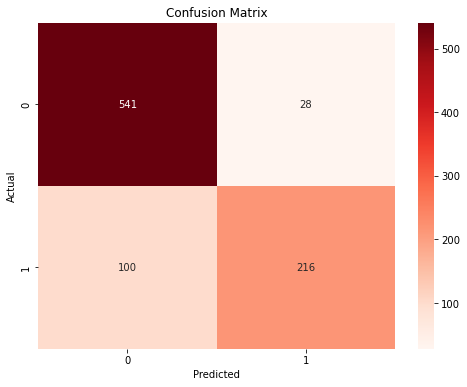

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


The top-left cell (541) represents students who did not drop out and were correctly predicted as non-dropouts.
The top-right cell (28) represents students who did not drop out but were incorrectly predicted as dropouts.
The bottom-left cell (100) represents students who dropped out but were incorrectly predicted as non-dropouts.
The bottom-right cell (216) represents students who dropped out and were correctly predicted as dropouts.”